In [1]:
import pandas as pd 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from urllib.request import urlopen
from bs4 import BeautifulSoup

import numpy as np
from os import path
from PIL import Image
import collections
import gensim
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/erdemsmac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/erdemsmac/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
text = pd.read_csv("/Users/erdemsmac/Desktop/davinci.txt")

In [3]:
print(text)

Empty DataFrame
Columns: [8 °C2402:0000:0023:0022:0021:0020:0019:0018:0017:3017:0011 Şubat 2016Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz Parisin bir odasında kalıyordu. Fakat gece yarısı respsiyondan gelen telefonla uyandı.Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz

In [4]:
def remove_punctuation(text):
    no_punc = [words for words in text if words not in string.punctuation]
    word_wo_punc = "".join(no_punc)
    return word_wo_punc

text = remove_punctuation(text)
print(text)

8 °C2402:0000:0023:0022:0021:0020:0019:0018:0017:3017:0011 Şubat 2016Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz Parisin bir odasında kalıyordu. Fakat gece yarısı respsiyondan gelen telefonla uyandı.Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz Parisin bir odasında kalı

In [5]:

def corpus_lower(corpus):
    corpus = corpus.lower()
    return corpus

text = corpus_lower(text)
print(text)

8 °c2402:0000:0023:0022:0021:0020:0019:0018:0017:3017:0011 şubat 2016da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu. fakat gece yarısı respsiyondan gelen telefonla uyandı.da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalı

In [6]:
def remove_numeric(corpus):
    output = ''.join(words for words in corpus if not words.isdigit())
    return output

text = remove_numeric(text)
text = text.replace("°c","")
print(text)

 :::::::::: şubat da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu. fakat gece yarısı respsiyondan gelen telefonla uyandı.da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu. fakat gece yarısı respsiyondan gelen telefon

In [7]:
text = text.split()
text

['::::::::::',
 'şubat',
 'da',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özeti:paris',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'bir',
 'gece',
 'müzede',
 'esrarengiz',
 'bir',
 'cinayete',
 'kurban',
 'gitmiştir.',
 'aslında',
 'o',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'ile',
 'buluşacaktı.',
 'profesor',
 'longdon',
 'iş',
 'gezisi',
 'için',
 'paristeydi',
 've',
 'jorques',
 'souniere',
 'ile',
 'de',
 'görüşmek',
 'istiyordu.',
 'kendisinden',
 'randevu',
 'talep',
 'etmiş',
 'fakat',
 'herhangi',
 'bir',
 'cevap',
 'alamamıştı.',
 'profesör',
 'longdan',
 'aynı',
 'gece',
 'hotel',
 'ritz',
 'parisin',
 'bir',
 'odasında',
 'kalıyordu.',
 'fakat',
 'gece',
 'yarısı',
 'respsiyondan',
 'gelen',
 'telefonla',
 'uyandı.da',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özeti:paris',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'bir',
 'gece',
 'müzede',
 'esrarengiz',
 'bir',
 'cinayete',
 'kurban',
 'gitmiştir.',
 'aslınd

In [8]:
source = urlopen("https://github.com/stopwords-iso/stopwords-tr/blob/master/stopwords-tr.txt").read()
soup = BeautifulSoup(source, "lxml")
print(set([text.parent.name for text in soup.find_all(text=True)]))

{'main', 'div', 'label', 'td', 'table', '[document]', 'tr', 'details', 'body', 'a', 'h4', 'h1', 'html', 'tab-container', 'include-fragment', 'title', 'head', 'clipboard-copy', 'template', 'ul', 'summary', 'header', 'details-menu', 'details-dialog', 'nav', 'input-demux', 'h2', 'span', 'strong', 'ref-selector', 'button', 'form', 'li', 'svg'}


In [9]:
stopwords = ''

for paragraph in soup.find_all("tr"):
    stopwords += paragraph.text
    
stopwords = stopwords.split()
stopwords

['acaba',
 'acep',
 'adamakıllı',
 'adeta',
 'ait',
 'altmýþ',
 'altmış',
 'altý',
 'altı',
 'ama',
 'amma',
 'anca',
 'ancak',
 'arada',
 'artýk',
 'aslında',
 'aynen',
 'ayrıca',
 'az',
 'açıkça',
 'açıkçası',
 'bana',
 'bari',
 'bazen',
 'bazý',
 'bazı',
 'başkası',
 'baţka',
 'belki',
 'ben',
 'benden',
 'beni',
 'benim',
 'beri',
 'beriki',
 'beþ',
 'beş',
 'beţ',
 'bilcümle',
 'bile',
 'bin',
 'binaen',
 'binaenaleyh',
 'bir',
 'biraz',
 'birazdan',
 'birbiri',
 'birden',
 'birdenbire',
 'biri',
 'birice',
 'birileri',
 'birisi',
 'birkaç',
 'birkaçı',
 'birkez',
 'birlikte',
 'birçok',
 'birçoğu',
 'birþey',
 'birþeyi',
 'birşey',
 'birşeyi',
 'birţey',
 'bitevi',
 'biteviye',
 'bittabi',
 'biz',
 'bizatihi',
 'bizce',
 'bizcileyin',
 'bizden',
 'bize',
 'bizi',
 'bizim',
 'bizimki',
 'bizzat',
 'boşuna',
 'bu',
 'buna',
 'bunda',
 'bundan',
 'bunlar',
 'bunları',
 'bunların',
 'bunu',
 'bunun',
 'buracıkta',
 'burada',
 'buradan',
 'burası',
 'böyle',
 'böylece',
 'böylecene',


In [10]:
filtered_text = []

for word in text:
    if word not in stopwords:
        filtered_text.append(word)

filtered_text

['::::::::::',
 'şubat',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özeti:paris',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'gece',
 'müzede',
 'esrarengiz',
 'cinayete',
 'kurban',
 'gitmiştir.',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'buluşacaktı.',
 'profesor',
 'longdon',
 'gezisi',
 'paristeydi',
 'jorques',
 'souniere',
 'görüşmek',
 'istiyordu.',
 'kendisinden',
 'randevu',
 'talep',
 'etmiş',
 'cevap',
 'alamamıştı.',
 'profesör',
 'longdan',
 'aynı',
 'gece',
 'hotel',
 'ritz',
 'parisin',
 'odasında',
 'kalıyordu.',
 'gece',
 'yarısı',
 'respsiyondan',
 'gelen',
 'telefonla',
 'uyandı.da',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özeti:paris',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'gece',
 'müzede',
 'esrarengiz',
 'cinayete',
 'kurban',
 'gitmiştir.',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'buluşacaktı.',
 'profesor',
 'longdon',
 'gezisi',
 'paristeydi',
 'jorques',
 'sou

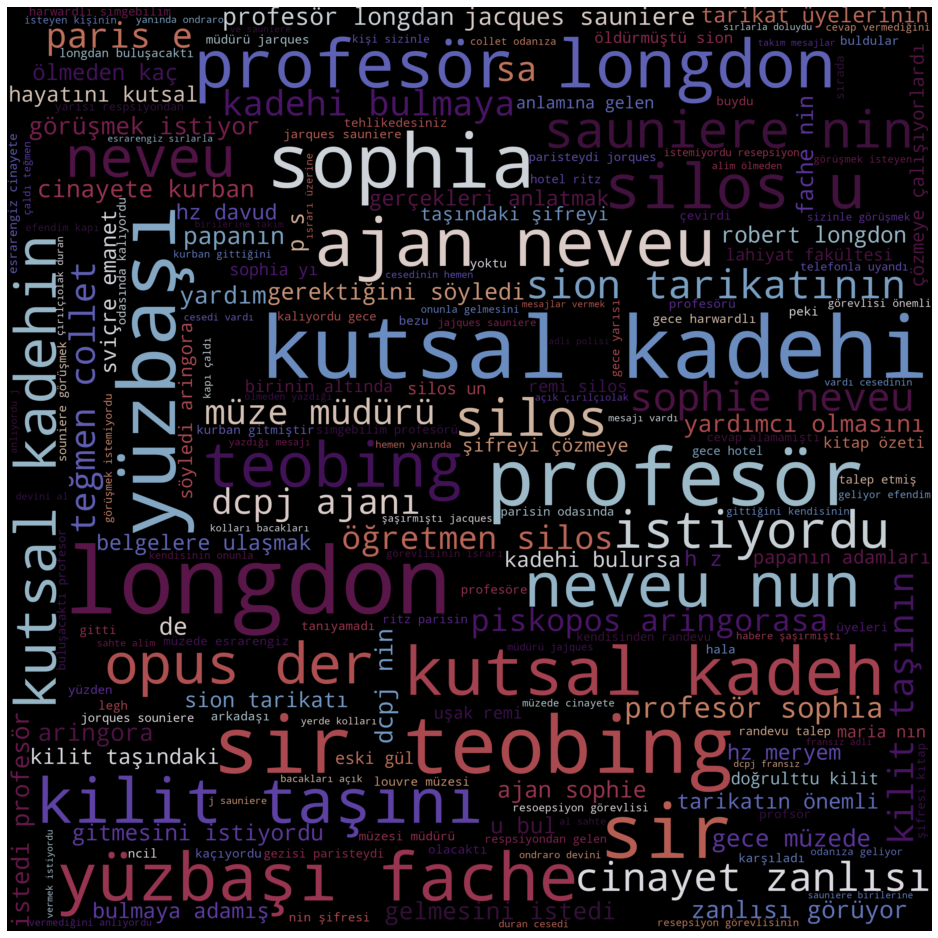

In [11]:
sentence = []

for i in filtered_text:
    sentence.append(i)
    
text_ = " ".join(map(str, sentence)) 

wordcloud = WordCloud(width = 3000, 
                      height = 3000, 
                      max_font_size = 300, 
                      colormap = "twilight_shifted").generate(text_)

plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [12]:
corpus = []

for cumle in filtered_text:
    corpus.append(cumle.split())
    
corpus

[['::::::::::'],
 ['şubat'],
 ['vinci’nin'],
 ['şifresi'],
 ['kitap'],
 ['özeti:paris'],
 ['louvre'],
 ['müzesi'],
 ['müdürü'],
 ['jarques'],
 ['sauniere'],
 ['gece'],
 ['müzede'],
 ['esrarengiz'],
 ['cinayete'],
 ['kurban'],
 ['gitmiştir.'],
 ['gece'],
 ['harwardlı'],
 ['simgebilim'],
 ['profesörü'],
 ['robert'],
 ['longdan'],
 ['buluşacaktı.'],
 ['profesor'],
 ['longdon'],
 ['gezisi'],
 ['paristeydi'],
 ['jorques'],
 ['souniere'],
 ['görüşmek'],
 ['istiyordu.'],
 ['kendisinden'],
 ['randevu'],
 ['talep'],
 ['etmiş'],
 ['cevap'],
 ['alamamıştı.'],
 ['profesör'],
 ['longdan'],
 ['aynı'],
 ['gece'],
 ['hotel'],
 ['ritz'],
 ['parisin'],
 ['odasında'],
 ['kalıyordu.'],
 ['gece'],
 ['yarısı'],
 ['respsiyondan'],
 ['gelen'],
 ['telefonla'],
 ['uyandı.da'],
 ['vinci’nin'],
 ['şifresi'],
 ['kitap'],
 ['özeti:paris'],
 ['louvre'],
 ['müzesi'],
 ['müdürü'],
 ['jarques'],
 ['sauniere'],
 ['gece'],
 ['müzede'],
 ['esrarengiz'],
 ['cinayete'],
 ['kurban'],
 ['gitmiştir.'],
 ['gece'],
 ['harwardlı'

In [13]:
model = Word2Vec(corpus,  window = 2, min_count = 2, sg = 1)
model

In [14]:
model.wv["müze"]

array([-6.4564659e-03,  7.3323892e-03,  6.1229132e-03, -4.9081375e-03,
       -1.7588520e-03, -2.5048994e-03,  3.1226445e-03, -4.5303107e-04,
       -2.7636099e-03, -9.0456437e-03,  6.4344313e-03, -9.6153906e-03,
       -8.6504463e-03,  1.3819766e-03,  2.9734327e-03,  4.7421454e-06,
        3.7009956e-04,  2.5892712e-03,  1.8025708e-03,  7.5683119e-03,
       -3.4463929e-03, -7.2333906e-03, -7.8841802e-03,  7.9196142e-03,
        1.9462728e-03, -5.8078575e-03,  6.3911914e-03,  8.4535787e-03,
        7.9466058e-03, -6.8279817e-03, -5.1414394e-03, -2.0103382e-03,
       -6.6176723e-03,  4.7288225e-03,  5.6644366e-03, -5.9959223e-03,
        7.1992562e-03, -7.6565552e-03,  6.2029026e-03, -4.6253297e-03,
        1.9614554e-03, -3.2713367e-03,  3.3896612e-03,  7.7184699e-03,
       -1.3945032e-03, -4.9851872e-03, -8.5616522e-03,  3.6374521e-03,
        4.2310166e-03,  6.6972231e-03, -4.2897630e-03, -9.7329905e-03,
        6.8215155e-03, -4.5247437e-03,  4.4197701e-03,  8.0545330e-03,
      

In [19]:
model.wv["dünya"]

array([-9.55236703e-03, -9.28060524e-03,  5.07730013e-03,  4.51294892e-03,
        1.03439088e-03,  5.55410376e-03, -9.99588706e-03,  1.91756967e-03,
        2.25248095e-03,  1.47969008e-03,  7.64078833e-03,  4.08931961e-03,
       -8.91166180e-03, -9.94679891e-03,  7.99177866e-03, -9.44566447e-03,
        6.93276897e-03, -2.62325280e-03,  7.26782577e-03,  4.11651144e-03,
        1.84134010e-03, -7.59082567e-03, -6.35805586e-03,  2.66853324e-03,
       -4.36648587e-03,  3.04455287e-03, -8.82275112e-04, -7.84526579e-03,
       -9.95908305e-03,  9.37230792e-03, -1.24474289e-03, -7.00441608e-03,
       -9.92794987e-03,  9.22257896e-04,  1.93082332e-03,  9.94703546e-03,
       -2.96444166e-03, -4.49068053e-03, -4.83397488e-03, -3.06077953e-03,
        4.02655825e-03,  5.12811402e-03,  9.93909873e-03,  5.50159207e-03,
       -5.13976812e-03, -5.06531494e-03, -7.36217992e-03,  4.92731808e-03,
       -6.18757494e-03, -2.20859051e-03, -2.19124788e-03,  4.47688578e-03,
        1.65876863e-03,  

In [23]:
#Önemli
model.wv.most_similar(int(1.80985685e-03))

[('suçu', 0.3595535457134247),
 ('kadını', 0.289742112159729),
 ('profesör’ün', 0.27770087122917175),
 ('aradı', 0.275379478931427),
 ('kapı', 0.27314674854278564),
 ('çizgisini', 0.26645752787590027),
 ('yerleştirdikten', 0.2580290138721466),
 ('arkadaşı', 0.2442401796579361),
 ('louvreye', 0.2434554398059845),
 ('papazlar', 0.230483740568161)]

In [15]:
model.wv.most_similar("dünya")

[('taşı', 0.3016461730003357),
 ('dan', 0.28820493817329407),
 ('pyramide', 0.28078606724739075),
 ('tapınak', 0.27385246753692627),
 ('yazılmış', 0.26819944381713867),
 ('aradığında', 0.2659449875354767),
 ('halinde', 0.25248947739601135),
 ('ettiğinde', 0.2519676983356476),
 ('takip', 0.244043231010437),
 ('saat', 0.23876594007015228)]

In [16]:
model.wv.most_similar("merkez")

[('’de', 0.32909613847732544),
 ('içindeki', 0.2968127429485321),
 ('alarak', 0.2897573709487915),
 ('leaning', 0.2798766791820526),
 ('ismi', 0.2556283473968506),
 ('istediler.', 0.25218260288238525),
 ('uçakla', 0.24559684097766876),
 ('oradaydı', 0.2384321689605713),
 ('tutukladılar.', 0.23764275014400482),
 ('tarihte', 0.23044848442077637)]

In [17]:
model.wv.most_similar("vinci")

[('new', 0.3343706727027893),
 ('ajanlar', 0.30087244510650635),
 ('bacakları', 0.2797636091709137),
 ('çizgisinin', 0.2782670855522156),
 ('telefonun', 0.26804250478744507),
 ('i̇skoçyada', 0.2674636244773865),
 ('yahudi', 0.2668730914592743),
 ('i̇ngilterede', 0.2434871643781662),
 ('çıktılar.', 0.2426885962486267),
 ('adamdır.', 0.23892419040203094)]

In [18]:
model.wv.most_similar("longdon")

[('korunuyordu.', 0.3286932408809662),
 ('tarikattı.', 0.26987093687057495),
 ('yazı', 0.2662349343299866),
 ('kadeh', 0.2529045641422272),
 ('der', 0.24194024503231049),
 ('güldü', 0.22695277631282806),
 ('söyledi.uzun', 0.2264615148305893),
 ('sembol', 0.22407136857509613),
 ('büyükannesiydi.', 0.21756115555763245),
 ('sırada', 0.21686133742332458)]